<img src = "https://rec-data.kalibrr.com/www.kalibrr.ph/logos/SSYTB3EN2CEV9HZDWPPE4JHP8X2T7CNC6SDZST8Y-5d0b4f4b.png" width = 800>

**Aditya Gumilar** <p>
**PYTN-KS05-002**

```
Kalau kita buat listnya/summary dari perintah di module kode id :

A. Measure of Central Tendency: Mean     (P/N/S)
B. Measure of Central Tendency: Median   (P/N/S)
C. Measure of Central Tendency: Modus    (P/N/S)
D. Measure of Spread: Range              (P/N/S)
E. Measure of Spread: Variance           (P/N/S)
F. Measure of Spread: Standard Deviation (P/N/S)
G. Probability Distribution              (+C)
H. Confidence Intervals
I. Hypothesis Testing                    (+C)

*for each (A - I):
- Question/what data we want to look up
- Pre-processing if needed

===
Keterangan:
(P/N/S) : Pandas / NumPy / Scipy
(+C)    : +Conclusion (menarik informasi/kesimpulan)

===
(*)Untuk:
- contoh question,  ada di page/halamannya Assignment 2 "Examples of questions can be ..."
- more detail tentang dekripsi kolom pada dataset & special note tentang dataset, juga ada di halaman yang sama
```

# Exploratory Dataset

In [1]:
#import library
import pandas as pd 
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.style.use('ggplot')


In [2]:
# Data sebelum dilakukan update
df_nyc = pd.read_csv('nyc-rolling-sales.csv')
df_nyc

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
# Data setelah dilakukan update
# Memasukan karakter atau nilai missing values untuk mengisi kolom yang memiliki baris kosong
mv = ['n/a', 'na', "--", "?", "NA", 'n-a', 'NaN', ' ', '-', ' -  ']
df_nyc = pd.read_csv('nyc-rolling-sales.csv', na_values=mv)
df_nyc['BOROUGH']= df_nyc['BOROUGH'].map({1:'Manhattan', 
                                          2:'Bronx', 
                                          3:'Brooklyn', 
                                          4:'Queens', 
                                          5:'Staten Island'})
df_nyc

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


Perbedaan dari kedua data diatas adalah data yang sebelum diupdate masih memiliki kolom dengan baris yang kosong. Setelah dilakukan update, baris yang kosong akan di isi dengan nilai Nan atau Nul.

In [4]:
# Melihat jumlah baris dan kolom
df_nyc.shape

(84548, 22)

In [5]:
# Mengecek missing values pada setiap baris
df_nyc.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [6]:
# Mendrop kolom unnamed:0 dan kolom dengan jumlah missing value paling banyak 
df_nyc = df_nyc.drop(['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], axis=1)

In [7]:
# Mendrop baris yang memiliki missing values
df_nyc = df_nyc.dropna()
df_nyc.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [8]:
# Jumlah baris dan kolom setelah dilakukan drop missing values dan drop kolom yang tidak digunakan
df_nyc.shape

(47892, 19)

In [9]:
# Melihat info dari dataset yang digunakan
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47892 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         47892 non-null  object 
 1   NEIGHBORHOOD                    47892 non-null  object 
 2   BUILDING CLASS CATEGORY         47892 non-null  object 
 3   TAX CLASS AT PRESENT            47892 non-null  object 
 4   BLOCK                           47892 non-null  int64  
 5   LOT                             47892 non-null  int64  
 6   BUILDING CLASS AT PRESENT       47892 non-null  object 
 7   ADDRESS                         47892 non-null  object 
 8   ZIP CODE                        47892 non-null  int64  
 9   RESIDENTIAL UNITS               47892 non-null  int64  
 10  COMMERCIAL UNITS                47892 non-null  int64  
 11  TOTAL UNITS                     47892 non-null  int64  
 12  LAND SQUARE FEET                

In [10]:
df_nyc

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [11]:
# Mengubah beberapa tipe data pada kolom agar memudahkan dalam perhitungan statistik
# 1. Mengubah beberapa tipe data dari yang tadinya int dan object menjadi category
# category adalah tipe data pandas yang sesuai dengan variabel kategoris dalam statistik
# tipe data category hanya memakan sedikit memory, berbeda dengan tipe data object
category = ["BOROUGH", 
            "NEIGHBORHOOD", 
            "BUILDING CLASS CATEGORY", 
            "TAX CLASS AT PRESENT", 
            "BUILDING CLASS AT PRESENT", 
            "ZIP CODE", 
            "YEAR BUILT", 
            "TAX CLASS AT TIME OF SALE", 
            "BUILDING CLASS AT TIME OF SALE"]

for col in category: 
    df_nyc[col] = df_nyc[col].astype("category")
    
# 2. Mengubah beberapa tipe data dari yang tadinya object menjadi numerik agar dapat dilakukan perhitungan statistik
numeric = ["RESIDENTIAL UNITS", 
           "COMMERCIAL UNITS", 
           "TOTAL UNITS", 
           "LAND SQUARE FEET", 
           "GROSS SQUARE FEET", 
           "SALE PRICE" ]

for col in numeric: 
    df_nyc[col] = pd.to_numeric(df_nyc[col], errors='coerce') # errors cource untuk menggantikan semua nilai non-numerik dengan NaN

In [12]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47892 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         47892 non-null  category
 1   NEIGHBORHOOD                    47892 non-null  category
 2   BUILDING CLASS CATEGORY         47892 non-null  category
 3   TAX CLASS AT PRESENT            47892 non-null  category
 4   BLOCK                           47892 non-null  int64   
 5   LOT                             47892 non-null  int64   
 6   BUILDING CLASS AT PRESENT       47892 non-null  category
 7   ADDRESS                         47892 non-null  object  
 8   ZIP CODE                        47892 non-null  category
 9   RESIDENTIAL UNITS               47892 non-null  int64   
 10  COMMERCIAL UNITS                47892 non-null  int64   
 11  TOTAL UNITS                     47892 non-null  int64   
 12  LAND SQUARE FEET  

In [13]:
# Mengecek data duplikat
print('Data duplikat (Sebelum diremove): ', df_nyc.duplicated().sum())
df_nyc.drop_duplicates(inplace=True)
print('Data duplikat (Setelah diremove): ', df_nyc.duplicated().sum())

Data duplikat (Sebelum diremove):  348
Data duplikat (Setelah diremove):  0


In [14]:
# Jumlah baris dan kolom pada dataset yang akan kita gunakan (FINAL)
df_nyc.shape

(47544, 19)

---
# A. Measure of Central Tendency : Mean (P)

**Question:**
1. Menghitung nilai Mean pada Sale Price
2. Mencari nilai Mean dari setiap Borough berdasarkan Sale Price
3. Menampilkan seluruh nilai Mean di masing-masing Borough

**Pre-processing**

In [15]:
# Untuk menampung sale price berdasarkan borough
Manhattan = df_nyc[df_nyc.BOROUGH == 'Manhattan']['SALE PRICE']
Bronx = df_nyc[df_nyc.BOROUGH == 'Bronx']['SALE PRICE']
Brooklyn = df_nyc[df_nyc.BOROUGH == 'Brooklyn']['SALE PRICE']
Queens = df_nyc[df_nyc.BOROUGH == 'Queens']['SALE PRICE']
StateIs = df_nyc[df_nyc.BOROUGH == 'Staten Island']['SALE PRICE']

**Implement statistical method**

In [16]:
# SOLUSI NO 1
mean_sp = df_nyc['SALE PRICE'].mean()
print('1. Nilai Mean pada Sale Price: ', mean_sp)
print('=================================================')

# SOLUSI NO 2
print('2. Nilai mean pada setiap Borough')
print('Manhattan     : ', Manhattan.mean())
print('Bronx         : ', Bronx.mean())
print('Brooklyn      : ', Brooklyn.mean())
print('Queens        : ', Queens.mean())
print('Staten Island : ', StateIs.mean())

1. Nilai Mean pada Sale Price:  1160689.618753155
2. Nilai mean pada setiap Borough
Manhattan     :  19207407.25181347
Bronx         :  594677.118387189
Brooklyn      :  841146.1972244689
Queens        :  910707.1553424409
Staten Island :  528485.6105931363


In [17]:
# SOLUSI NO 3
print('')
print('3. Nilai Mean setiap Borough')
mean_b = df_nyc.groupby('BOROUGH').mean()
mean_b


3. Nilai Mean setiap Borough


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Bronx,4202.934372,298.625679,3.343580,0.160280,3.510152,3909.012725,4489.147412,5.946771e+05
Brooklyn,4305.969989,327.076923,2.041761,0.147631,2.227108,2046.266868,2518.944149,8.411462e+05
Manhattan,1328.195855,51.363731,19.906736,2.236269,22.134715,5690.573057,35261.449741,1.920741e+07
Queens,8018.174070,54.113091,2.172804,0.373564,2.545644,3962.854248,2926.781960,9.107072e+05
Staten Island,3366.640746,81.992263,1.356279,0.098790,1.453878,6340.386035,2366.328705,5.284856e+05


In [18]:
bl_mean = mean_b.groupby('BOROUGH')['BLOCK'].max().sort_values(ascending=False)
lot_mean = mean_b.groupby('BOROUGH')['LOT'].max().sort_values(ascending=False)
ru_mean = mean_b.groupby('BOROUGH')['RESIDENTIAL UNITS'].max().sort_values(ascending=False)
cu_mean = mean_b.groupby('BOROUGH')['COMMERCIAL UNITS'].max().sort_values(ascending=False)
tu_mean = mean_b.groupby('BOROUGH')['TOTAL UNITS'].max().sort_values(ascending=False)
lsf_mean = mean_b.groupby('BOROUGH')['LAND SQUARE FEET'].max().sort_values(ascending=False)
gsf_mean = mean_b.groupby('BOROUGH')['GROSS SQUARE FEET'].max().sort_values(ascending=False)
sp_mean = mean_b.groupby('BOROUGH')['SALE PRICE'].max().sort_values(ascending=False)

In [19]:
print('MEAN_HIGH_BLOCK:\n',bl_mean.head(1))
print('==================================')
print('MEAN_HIGH_LOT:\n',lot_mean.head(1))
print('==================================')
print('MEAN_HIGH_RESIDENTIAL UNITS:\n',ru_mean.head(1))
print('==================================')
print('MEAN_HIGH_COMMERCIAL UNITS:\n',cu_mean.head(1))
print('==================================')
print('MEAN_HIGH_TOTAL UNITS:\n',tu_mean.head(1))
print('==================================')
print('MEAN_HIGH_LAND SQUARE FEET:\n',lsf_mean.head(1))
print('==================================')
print('MEAN_HIGH_GROSS SQUARE FEET:\n',gsf_mean.head(1))
print('==================================')
print('MEAN_HIGH_SALE PRICE:\n',sp_mean.head(1))
print('==================================')

MEAN_HIGH_BLOCK:
 BOROUGH
Queens    8018.17407
Name: BLOCK, dtype: float64
MEAN_HIGH_LOT:
 BOROUGH
Brooklyn    327.076923
Name: LOT, dtype: float64
MEAN_HIGH_RESIDENTIAL UNITS:
 BOROUGH
Manhattan    19.906736
Name: RESIDENTIAL UNITS, dtype: float64
MEAN_HIGH_COMMERCIAL UNITS:
 BOROUGH
Manhattan    2.236269
Name: COMMERCIAL UNITS, dtype: float64
MEAN_HIGH_TOTAL UNITS:
 BOROUGH
Manhattan    22.134715
Name: TOTAL UNITS, dtype: float64
MEAN_HIGH_LAND SQUARE FEET:
 BOROUGH
Staten Island    6340.386035
Name: LAND SQUARE FEET, dtype: float64
MEAN_HIGH_GROSS SQUARE FEET:
 BOROUGH
Manhattan    35261.449741
Name: GROSS SQUARE FEET, dtype: float64
MEAN_HIGH_SALE PRICE:
 BOROUGH
Manhattan    1.920741e+07
Name: SALE PRICE, dtype: float64


**Kesimpulan:**

Berdasarkan data pada nomor 3, dapat ditarik kesimpulan bahwa wilayah Manhattan memiliki nilai mean tertinggi untuk RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS, GROSS SQUARE FEET, dan Price Sale

---
# B. Measure of Central Tendency : Median (P)

**Question:**
1. Menghitung nilai Median pada Sale Price
2. Mencari nilai Median dari setiap Borough berdasarkan Sale Price
3. Wilayah mana saja yang memiliki nilai median tertinggi jika berdasarkan kolom Land Square Feet, Gross Square Feet dan Sale Price?

**Pre-procesing:** Menggunakan data dan variabel yang sama pada saat mencari Mean (No 2 A)

**Implement statistical method**

In [20]:
# SOLUSI NO 1
median_sp = df_nyc['SALE PRICE'].median()
print('1. Nilai Median pada Sale Price: ', median_sp)
print('==========================================')

# SOLUSI NO 2
print('2. Nilai Median pada setiap Borough')
print('Manhattan     : ', Manhattan.median())
print('Bronx         : ', Bronx.median())
print('Brooklyn      : ', Brooklyn.median())
print('Queens        : ', Queens.median())
print('Staten Island : ', StateIs.median())

1. Nilai Median pada Sale Price:  483000.0
2. Nilai Median pada setiap Borough
Manhattan     :  6500000.0
Bronx         :  274897.0
Brooklyn      :  425000.0
Queens        :  635000.0
Staten Island :  485000.0


In [21]:
# SOLUSI NO 3
print('')
print('3. Nilai Median setiap Borough berdasarkan masing-masing kolom')
median_b = df_nyc.groupby('BOROUGH').median()
median_b


3. Nilai Median setiap Borough berdasarkan masing-masing kolom


,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Bronx,4177.5,47.0,1.0,0.0,1.0,2375.0,1764.0,274897.0
Brooklyn,4547.0,50.0,1.0,0.0,1.0,1833.0,1560.0,425000.0
Manhattan,1415.0,35.0,4.0,0.0,6.0,2469.0,7535.0,6500000.0
Queens,8839.0,36.0,1.0,0.0,1.0,2775.0,1620.0,635000.0
Staten Island,3234.0,49.0,1.0,0.0,1.0,3400.0,1541.0,485000.0


**Kesimpulan:**

Secara keseluruhan, dapat ditarik kesimpulan bahwa wilayah Manhattan memiliki nilai median tertinggi pada Total Units, Gross Square Feet, dan Sale Price. Wilayah Queens memiliki nilai median tertinggi pada Block, sedangkan Wilayah Brooklyn pada LOT, dan Wilayah Staten Island pada Land Square Feet.

# C. Measure of Central Tendency: Modus (P)

**Question:**
Mencari modus pada setiap kolom yang memiliki tipe data category:
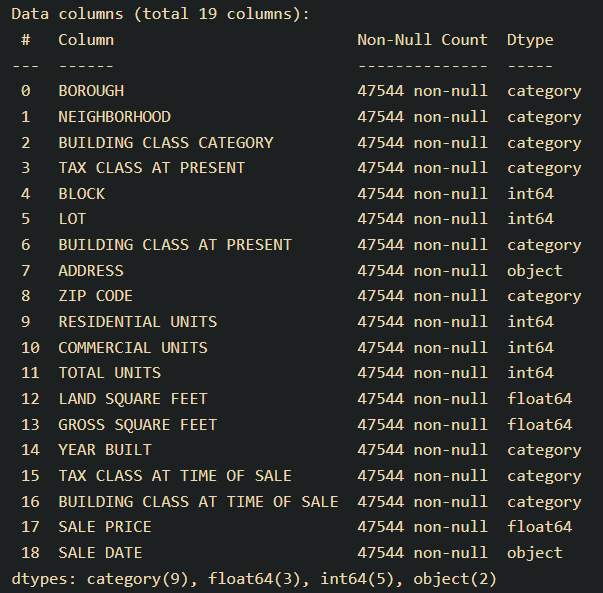

**Pre-Processing**

In [22]:
# Untuk menampung semua data berdasarkan masing-masing kolom
col_bor = df_nyc.BOROUGH
col_neigh = df_nyc.NEIGHBORHOOD
col_bcc = df_nyc['BUILDING CLASS CATEGORY']
col_tcp = df_nyc['TAX CLASS AT PRESENT']
col_bcp = df_nyc['BUILDING CLASS AT PRESENT']
col_add = df_nyc.ADDRESS
col_zip = df_nyc['ZIP CODE']
col_year = df_nyc['YEAR BUILT']
col_tcts = df_nyc['TAX CLASS AT TIME OF SALE']
col_bcts = df_nyc['BUILDING CLASS AT TIME OF SALE']

**Implement statistical method**

In [23]:
print("======= Menampilkan modus dari masing-masing kolom =======")
print('')
print("Borough                         :" , statistics.mode(col_bor))
print("Neighborhood                    :" , statistics.mode(col_neigh))
print("Building Class Category         :" , statistics.mode(col_bcc))
print("Tax Class at Present            :" , statistics.mode(col_tcp))
print("Building Class at Present       :" , statistics.mode(col_bcp))
print("Address                         :" , statistics.mode(col_add))
print("Zip Code                        :" , statistics.mode(col_zip)) 
print("Year Built                      :" , statistics.mode(col_year)) 
print("Tax Class at Time of Sale       :" , statistics.mode(col_tcts))
print("Building Class at Time of Sale  :" , statistics.mode(col_bcts))

======= Menampilkan modus dari masing-masing kolom =======

Borough                         : Brooklyn
Neighborhood                    : BEDFORD STUYVESANT
Building Class Category         : 01 ONE FAMILY DWELLINGS                    
Tax Class at Present            : 1
Building Class at Present       : A1
Address                         : 429 KENT AVENUE
Zip Code                        : 11201
Year Built                      : 1920
Tax Class at Time of Sale       : 1
Building Class at Time of Sale  : A1


**Conclusion:**

Dapat ditarik kesimpulan bahwa setiap kolom memiliki nilai modusnya masing-masing (Nilai yang paling sering muncul). Sebagai contoh yaitu Brooklyn merupakan wilayah yang sering atau paling banyak muncul dikolom Borough.

# D. Measure of Spread: Range (N)

**Question:**

Carilah masing-masing nilai range pada Sale Price berdasarkan kolom Borough!


**Pre-Processing**

In [24]:
# Range pada kolom Sale Price
range_sp = np.ptp(df_nyc['SALE PRICE'])
range_sp

2210000000.0

**Implement statistical method**

In [25]:
# Range Sale Price berdasarkan masing-masing Borough
range_br = df_nyc.groupby('BOROUGH').apply(lambda x: x['SALE PRICE'].max() - x['SALE PRICE'].min())
range_br

BOROUGH
Bronx            1.100000e+08
Brooklyn         3.450000e+08
Manhattan        2.210000e+09
Queens           2.575000e+08
Staten Island    1.190000e+07
dtype: float64

**Conclusion:**

Nilai Range Sale Price tertinggi ada di Manhattan, sedangkan range terendah ada di Staten Island. Nilai keduanya memiliki perbedaan yang cukup jauh. Berbeda jika kita melihat range Sale Price pada wilayah Bronx dan Queens, keduanya memiliki nilai range yang tidak terlalu jauh.

# E. Measure of Spread: Variance (P)

**Question:**<p>
Hitunglah nilai variance berdasarkan masing-masing Borough!

**Pre-Processing**

In [26]:
var_bor = df_nyc.groupby('BOROUGH')

**Implement statistical method**

In [27]:
# Variance untuk seluruh data berdasarkan masing-masing kolom
df_nyc.var()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_15996/2437314371.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_nyc.var()


BLOCK                1.177704e+07
LOT                  2.407803e+05
RESIDENTIAL UNITS    2.969413e+02
COMMERCIAL UNITS     1.184959e+02
TOTAL UNITS          4.203279e+02
LAND SQUARE FEET     9.401231e+08
GROSS SQUARE FEET    8.591605e+08
SALE PRICE           1.820359e+14
dtype: float64

In [28]:
# Variance berdasarkan masing-masing borough/wilayah
var_bor = var_bor.var(ddof=1)
var_bor

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,,,,,,
Bronx,1.116755e+06,574149.535826,498.684024,0.771532,514.454709,3.375209e+08,8.683572e+08,7.803693e+12
Brooklyn,7.292089e+06,278239.700043,73.990465,2.744317,76.881881,7.994821e+07,2.242642e+08,1.583969e+13
Manhattan,3.486518e+05,9707.891422,4570.101251,194.844534,4748.886397,2.003158e+08,1.227212e+10,8.042303e+15
Queens,1.893168e+07,9315.805885,374.115268,483.102656,863.831001,1.645631e+09,1.392988e+09,1.378343e+13
Staten Island,5.623890e+06,9318.899742,8.314707,6.413254,14.543160,4.361289e+09,2.516135e+08,2.268238e+11


**Conclusion:**<p>
    Berdasarkan tabel variance diatas:<p> 
        1. Bronx memiliki nilai variance tertinggi di LOT<p>
        2. Manhattan memiliki nilai variance tertinggi di Residential Units, Total Units, Gross Square Feet dan Sale Price<p>
        3. Queens memiliki nilai variance tertinggi di Block dan Commercial Units<p>
        4. Staten Island memiliki nilai variance tertinggi di Land Square Feet<p>

# F. Measure of Spread: Standard Deviation (P)

**Question:** <p>
Carilah nilai Standar Deviasi berdasarkan masing-masing Borough!

**Implement statistical method**

In [29]:
# Standar Deviasi dapat diperoleh dari hasil variance dipangkatkan 0.5
# std_bor = var_bor ** 0.5
std_bor = var_bor.std(ddof=1)
std_bor

BLOCK                7.460360e+06
LOT                  2.510952e+05
RESIDENTIAL UNITS    1.947719e+03
COMMERCIAL UNITS     2.102184e+02
TOTAL UNITS          1.989643e+03
LAND SQUARE FEET     1.810527e+09
GROSS SQUARE FEET    5.204732e+09
SALE PRICE           3.592423e+15
dtype: float64

In [30]:
np.std(var_bor, ddof=1)

BLOCK                7.460360e+06
LOT                  2.510952e+05
RESIDENTIAL UNITS    1.947719e+03
COMMERCIAL UNITS     2.102184e+02
TOTAL UNITS          1.989643e+03
LAND SQUARE FEET     1.810527e+09
GROSS SQUARE FEET    5.204732e+09
SALE PRICE           3.592423e+15
dtype: float64

**Conclusion:** <p>
    Nilai standar deviasi tertinggi ada di kolom Sale Price, karena pada kasus ini kita menghitung standar deviasi untuk seluruh data numerik berdasarkan Borough. 

# G. Probability Distribution

**Question:**<p>
    Bagaimana Distribusi Probabilitas Sale Price di Manhattan?

**Pre-processing**

In [31]:
bor = df_nyc.groupby('BOROUGH')
df_manhattan = bor.get_group('Manhattan')

**Implement statistical method**

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'SALE PRICE'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Manhattan')]

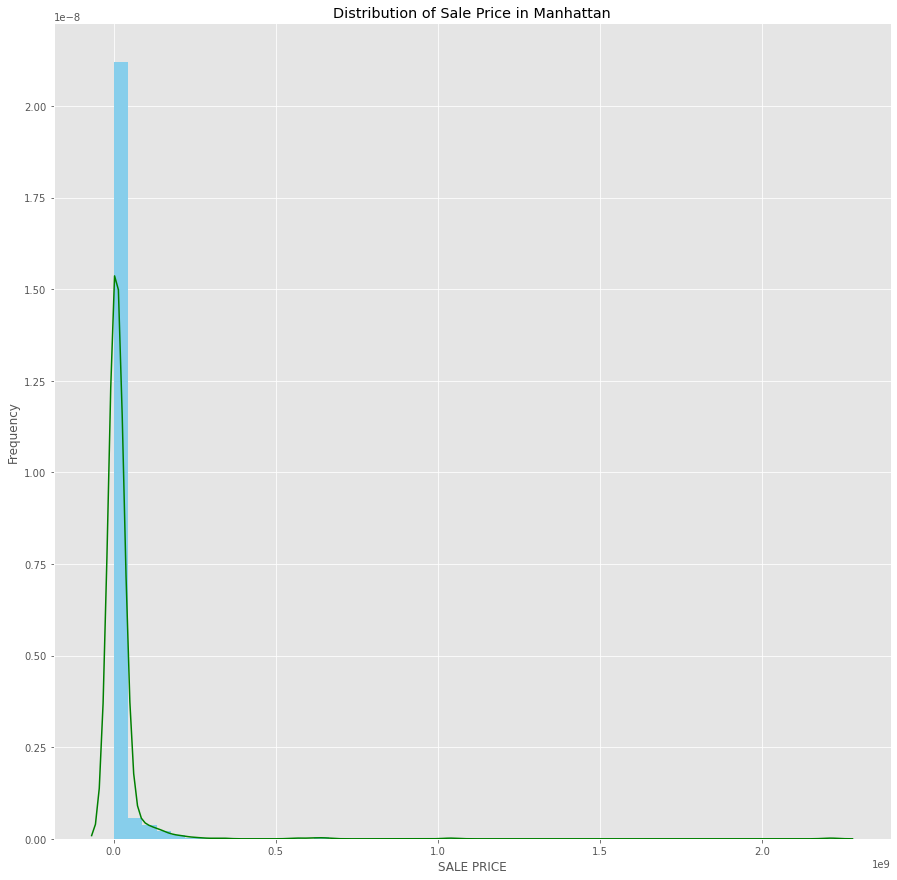

In [32]:
plt.figure(figsize=(15, 15), facecolor='white')

ax = sns.distplot(df_manhattan['SALE PRICE'],
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 16,
                            'alpha': 1,
                            'color': 'skyblue'}
                 )

ax.set(xlabel='SALE PRICE',
       ylabel='Frequency',
       title='Distribution of Sale Price in Manhattan')

Selanjutnya coba menggunakan data Sale Price dengan range 100.000 - 90.000.000, yang bertujuan untuk membatasi panjang dari histogram dan grafik line distribusinya.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'SALE PRICE'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Sale Price in Manhattan')]

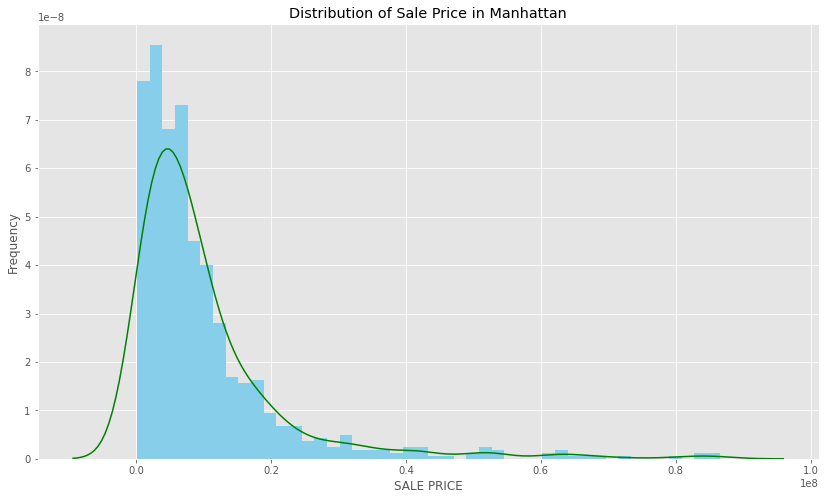

In [33]:
rangebor = df_manhattan[(df_manhattan['SALE PRICE'] > 100000) & (df_manhattan['SALE PRICE'] < 90000000)]

plt.figure(figsize=(14, 8), facecolor='white')
ax = sns.distplot(rangebor['SALE PRICE'],
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 16,
                            'alpha': 1,
                            'color': 'skyblue'}
                 )

ax.set(xlabel='SALE PRICE',
       ylabel='Frequency',
       title='Distribution of Sale Price in Manhattan')

Setelah kita menggunakan range pada data sale price, selanjutnya kita mencoba mencari grafik distribusi yang cocok berdasarkan gambar diatas.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'SALE PRICE'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Exponential Distribution of Sale Price in Manhattan')]

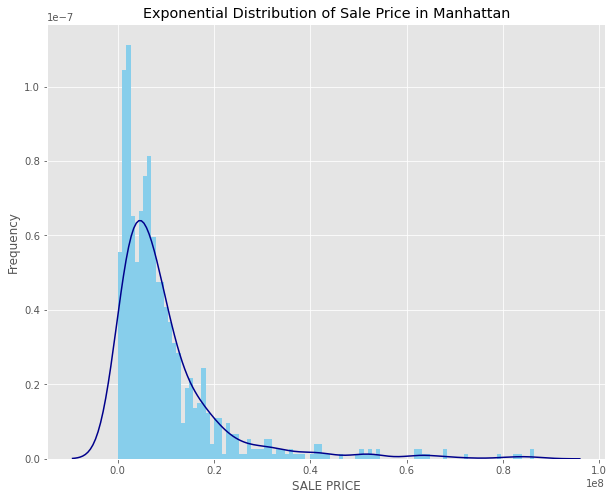

In [34]:
# Mengimport library untuk mencari distribusi yang cocok
from scipy.stats import expon

plt.figure(figsize=(10, 8), facecolor='white')
dt_dist = expon.rvs(rangebor['SALE PRICE'])
ax = sns.distplot(dt_dist, kde=True, bins=100, color='darkblue',  hist_kws={"linewidth": 16, 'alpha': 1, 'color' : 'skyblue'})
ax.set(xlabel='SALE PRICE', ylabel='Frequency', title='Exponential Distribution of Sale Price in Manhattan')

**Conclusion:**

Distribusi Sale Price di Manhattan mengikuti Distribusi Eksponential, karena bentuk histogram dan grafik line distribusinya mengikuti dataset yang digunakan

# H. Confidence Intervals

**Question:** <p>
    Bagaimana membuat Confidence Intervals dari Mean Sale Price di Manhattan?

**Pre-processing**

In [35]:
# Untuk mendapatkan mean, std dan size berdasarkan masing-masing borough
df_CI = df_nyc.groupby("BOROUGH").agg({"SALE PRICE":[np.mean, np.std, np.size]})
df_CI

SALE PRICE                     
                       mean           std   size
BOROUGH                                         
Bronx          5.946771e+05  2.793509e+06   6994
Brooklyn       8.411462e+05  3.979911e+06  23491
Manhattan      1.920741e+07  8.967889e+07    965
Queens         9.107072e+05  3.712604e+06  11053
Staten Island  5.284856e+05  4.762602e+05   5041

In [36]:
# Untuk mencari banyaknya wilayah Manhattan 
count_manhattan = df_nyc.BOROUGH == 'Manhattan'
count_manhattan = count_manhattan.sum()
count_manhattan

965

**Implement statistical method**

In [37]:
mean_manhattan = 1.920741e+07
std_manhattan = 8.967889e+07	
z = 1.96
se = std_manhattan / np.sqrt(count_manhattan)

In [38]:
print('Mean Manhattan      : ', mean_manhattan)
print('Standar Deviasi     : ', std_manhattan)
print('Banyaknya Manhattan : ', count_manhattan)
print('Z-Score             : ', z)
print('standar error       : ', se)

Mean Manhattan      :  19207410.0
Standar Deviasi     :  89678890.0
Banyaknya Manhattan :  965
Z-Score             :  1.96
standar error       :  2886865.613264464


In [39]:
print('Lower limit of Confidence Interval: ', round(mean_manhattan - z * se, 3))
print('Upper limit of Confidence Interval: ', round(mean_manhattan + z * se, 3))

Lower limit of Confidence Interval:  13549153.398
Upper limit of Confidence Interval:  24865666.602


**Conclusion:** <p>
Diperoleh hasil Confidence Interval untuk rata-rata SALE PRICE di Wilayah Manhattan yaitu antara 13549153.398 dan 24865666.602

# I. Hypothesis Testing

**Question:** <p>
    Dalam hypotesis testing, ada dua masalah yang dicari bukti kebenerannya: <p>
    1. Dengan mempertimbangkan wilayah Manhattan, apakah wilayah Bronx memiliki indeks rata-rata yang lebih tinggi daripada Manhattan? <p>
    2. Jika pada data Neighborhood hanya memilih Woodlawn dengan Resident Unitnya = 1 dan Total Unitnya = 1, apakah LAND SQUARE FEET dan GROSS SQUARE FEET pada data Woodlawn merupakan dua sample independent? <p>

**Pre-processing**

In [40]:
# Mengambil semua data berdasarkan wilayah yang dipilih
manhatt = df_nyc[df_nyc["BOROUGH"] == "Manhattan"]
brnx = df_nyc[df_nyc["BOROUGH"] == "Bronx"]

**Implement statistical method**

In [41]:
# Manhattan
len_mnht = len(manhatt)
mean_mnht = manhatt['SALE PRICE'].mean()
std_mnht = manhatt['SALE PRICE'].std()

# Bronx 
len_brnx = len(brnx)
mean_brnx = brnx['SALE PRICE'].mean()
std_brnx = brnx['SALE PRICE'].std()

In [42]:
d = {'Borough': ['Manhattan', 'Bronx'],
     'Length_Bor': [len_mnht, len_brnx],
     'Mean_Bor': [mean_mnht, mean_brnx],
     'Std_Bor': [std_mnht, std_brnx]
     }
df_HT = pd.DataFrame(data=d)
df_HT

,Borough,Length_Bor,Mean_Bor,Std_Bor
0,Manhattan,965,1.920741e+07,8.967889e+07
1,Bronx,6994,5.946771e+05,2.793509e+06


In [43]:
sm.stats.ztest(manhatt["SALE PRICE"].dropna(), 
brnx["SALE PRICE"].dropna(),alternative='two-sided')

(17.303347103240743, 4.438368811878268e-67)

**Conclusion:**

Karena p-value (4.43e-67) sangat kecil, kita dapat **reject the Null hypothesis** bahwa indeks rata-rata wilayah Bronx lebih besar dari Manhattan. Alternative="two-sided" digunakan dalam z-test karena di sini memeriksa ketidaksamaan.

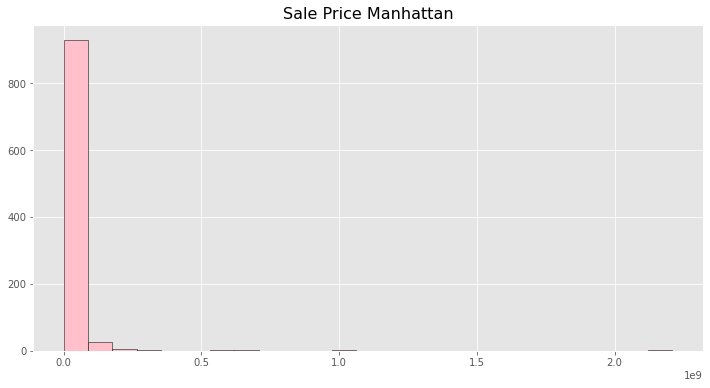

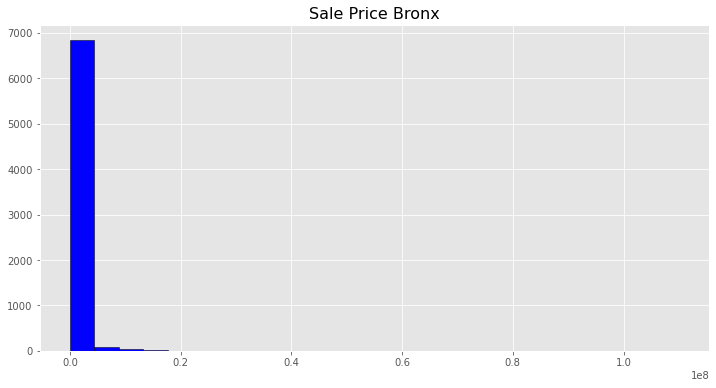

In [44]:
plt.figure(figsize=(12,6))
plt.title("Sale Price Manhattan", fontsize=16)
plt.hist(manhatt["SALE PRICE"].dropna(), edgecolor='k',color='pink', bins=25)
plt.show()

plt.figure(figsize=(12,6))
plt.title("Sale Price Bronx",fontsize=16)
plt.hist(brnx["SALE PRICE"].dropna(), edgecolor='k', color='blue', bins=25)
plt.show()

**Statistical Hypothesis Test Cheat sheet**

**Correlation Tests** <p>
This section lists statistical tests that you can use to check if two samples are related. <p>
**Pearson's Correlation Coefficient** <p>
Tests whether two samples have a linear relationship. <p>
**Assumptions** <p>
     • Observations in each sample are independent and identically distributed (iid). <p>
     • Observations in each sample are normally distributed. <p>
     • Observations in each sample have the same variance. <p>
**Interpretation** <p>
     • HO: the two samples are independent. <p>
     • H1: there is a dependency between the samples. <p>

In [45]:
# mengambil seluruh data berdasarkan kolom neighborhood = Woodlawn
df_woodlawn = df_nyc[df_nyc.NEIGHBORHOOD == 'WOODLAWN']

In [46]:
# data Woodlawn selanjutnya di filter berdasarkan kategori tertentu
df_woodlawn = df_woodlawn[(df_woodlawn['RESIDENTIAL UNITS'] == 1) &
                    (df_woodlawn['TOTAL UNITS'] == 1) &
                    (df_woodlawn['LAND SQUARE FEET']) &
                    (df_woodlawn['GROSS SQUARE FEET'])]
df_woodlawn.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
25270,Bronx,WOODLAWN,01 ONE FAMILY DWELLINGS,1,3363,65,A1,4218 HERKIMER PLACE,10470,1,0,1,2500.0,1397.0,1935,1,A1,455000.0,2016-09-21 00:00:00
25271,Bronx,WOODLAWN,01 ONE FAMILY DWELLINGS,1,3365,64,A1,83 EAST 233RD STRET,10470,1,0,1,2675.0,2675.0,1920,1,A1,765000.0,2017-04-17 00:00:00
25272,Bronx,WOODLAWN,01 ONE FAMILY DWELLINGS,1,3369,12,A1,124 EAST 235 STREET,10470,1,0,1,2500.0,1537.0,1925,1,A1,0.0,2017-02-01 00:00:00
25273,Bronx,WOODLAWN,01 ONE FAMILY DWELLINGS,1,3370,55,A1,111 EAST 235 STREET,10470,1,0,1,2500.0,1224.0,1920,1,A1,370000.0,2017-04-26 00:00:00
25274,Bronx,WOODLAWN,01 ONE FAMILY DWELLINGS,1,3373,26,A1,135 EAST 238TH STREET,10470,1,0,1,2500.0,1964.0,1925,1,A1,405600.0,2017-03-08 00:00:00


In [47]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = df_woodlawn['LAND SQUARE FEET']
data2 = df_woodlawn['GROSS SQUARE FEET']
stat, p = pearsonr(data1, data2)
print('stat=%.4f, p=%.4f' % (stat, p))
if p > 0.05:
    print('Probably independent') 
else:
    print('Probably dependent')

stat=-0.0184, p=0.9354
Probably independent


**Conclusion:**<p>
    Menurut hypothesis diawal, apakah Land Square Feet dan Gross Square Feet termasuk kedalam dua sampel yang independent jika menggunakan data Woodlawn yang telah difilter?
    **Jawabannya** adalah iya, kedua sample tersebut adalah independent. Karena nilai P yang diperoleh itu lebih dari nilai 0.05 atau 5%. <p>